In [1]:
!pip install -q PyPortfolioOpt
!pip install -q yfinance

     |████████████████████████████████| 61 kB 1.4 MB/s 
     |████████████████████████████████| 62 kB 452 kB/s 


In [2]:
import yfinance as yf
import pandas as pd
import plotly.express as px
import seaborn as sns

from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [3]:
#imports the dataframe downloaded on 'Status Invest'
acoes = pd.read_csv('acoes.csv', sep=";")
acoes.head()

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,...,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
0,AALR3,20.54,NaN,-75.24,2.10,0.96,31.73,5.79,-2.87,37.27,...,0.46,0.53,0.44,3.62,NaN,5695769.75,9.80,-0.27,1.48,2429734440.64
1,ABCB4,17.70,6.49,5.83,0.81,0.08,16.60,11.66,10.08,5.04,...,0.10,0.90,0.13,7.15,11.89,11557927.11,21.72,3.04,0.10,4001795088.6
2,ABEV3,15.14,3.99,17.61,2.76,1.75,49.91,22.47,17.60,13.79,...,0.63,0.36,0.56,9.82,1.54,391257859.96,5.48,0.86,-2.49,238458283124.14
3,AERI3,3.28,0.63,53.03,2.53,0.81,11.08,8.41,2.02,12.74,...,0.32,0.68,0.76,NaN,NaN,8678471.64,1.30,0.06,-0.88,2513180135.68
4,AESB3,10.15,1.06,10.57,1.53,0.35,23.57,15.63,18.74,12.68,...,0.23,0.68,0.18,NaN,NaN,"13.409.583,00",6.65,0.96,NaN,4994880924.25


In [4]:
#fills NA values with 0
acoes = acoes.fillna(0)

In [5]:
#Corrects a mistake on the dataframe
acoes[acoes['P/EBIT'] == '-6.840,00'] = 6.840

In [6]:
acoes.head()

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,...,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
0,AALR3,20.54,0.00,-75.24,2.10,0.96,31.73,5.79,-2.87,37.27,...,0.46,0.53,0.44,3.62,0.00,5695769.75,9.80,-0.27,1.48,2429734440.64
1,ABCB4,17.70,6.49,5.83,0.81,0.08,16.60,11.66,10.08,5.04,...,0.10,0.90,0.13,7.15,11.89,11557927.11,21.72,3.04,0.10,4001795088.6
2,ABEV3,15.14,3.99,17.61,2.76,1.75,49.91,22.47,17.60,13.79,...,0.63,0.36,0.56,9.82,1.54,391257859.96,5.48,0.86,-2.49,238458283124.14
3,AERI3,3.28,0.63,53.03,2.53,0.81,11.08,8.41,2.02,12.74,...,0.32,0.68,0.76,0.00,0.00,8678471.64,1.30,0.06,-0.88,2513180135.68
4,AESB3,10.15,1.06,10.57,1.53,0.35,23.57,15.63,18.74,12.68,...,0.23,0.68,0.18,0.00,0.00,"13.409.583,00",6.65,0.96,0.00,4994880924.25


In [7]:
#filters for stocks that are profitable, with a P/E ratio > 0 
ac_lucro = acoes[acoes['P/L'] > 0]
ac_lucro

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,...,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
1,ABCB4,17.70,6.49,5.83,0.81,0.08,16.60,11.66,10.08,5.04,...,0.10,0.90,0.13,7.15,11.89,11557927.11,21.72,3.04,0.10,4001795088.6
2,ABEV3,15.14,3.99,17.61,2.76,1.75,49.91,22.47,17.60,13.79,...,0.63,0.36,0.56,9.82,1.54,391257859.96,5.48,0.86,-2.49,238458283124.14
3,AERI3,3.28,0.63,53.03,2.53,0.81,11.08,8.41,2.02,12.74,...,0.32,0.68,0.76,0.00,0.00,8678471.64,1.30,0.06,-0.88,2513180135.68
4,AESB3,10.15,1.06,10.57,1.53,0.35,23.57,15.63,18.74,12.68,...,0.23,0.68,0.18,0.00,0.00,"13.409.583,00",6.65,0.96,0.00,4994880924.25
5,AGRO3,25.18,18.42,3.20,1.04,0.74,39.85,35.81,58.48,5.22,...,0.71,0.29,0.39,55.29,151.67,12558616.57,24.12,7.88,0.01,2577853061.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,VULC3,13.39,2.61,9.00,2.18,1.51,35.86,17.39,15.96,8.26,...,0.69,0.31,1.05,10.48,59.24,4647733.5,6.15,1.49,0.11,3290676107.16
288,VVEO3,17.85,2.27,17.89,2.29,0.72,16.45,5.34,4.10,13.75,...,0.32,0.68,0.98,0.00,0.00,2411558.18,7.80,1.00,-1.18,"5.107.301.976,00"
289,WEGE3,30.80,1.53,36.48,9.64,4.99,27.88,15.77,13.25,30.64,...,0.52,0.47,1.03,20.26,25.96,210708554.75,3.20,0.84,4.64,129277394338.4
291,WIZS3,8.46,6.95,8.36,3.86,0.71,59.67,40.34,20.07,4.16,...,0.18,0.55,0.42,15.13,2.22,5984377.96,2.19,1.01,-0.38,1352815605.72


In [8]:
#Filters for cheap stocks, with a low EV/EBIT

ac_baratas = ac_lucro[ac_lucro['EV/EBIT'] <= ac_lucro['EV/EBIT'].median()]
ac_baratas

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,...,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
1,ABCB4,17.70,6.49,5.83,0.81,0.08,16.60,11.66,10.08,5.04,...,0.10,0.90,0.13,7.15,11.89,11557927.11,21.72,3.04,0.10,4001795088.6
5,AGRO3,25.18,18.42,3.20,1.04,0.74,39.85,35.81,58.48,5.22,...,0.71,0.29,0.39,55.29,151.67,12558616.57,24.12,7.88,0.01,2577853061.44
7,ALLD3,12.05,11.05,4.25,0.73,0.28,13.72,6.66,4.42,2.82,...,0.39,0.61,1.51,0.00,0.00,561547.79,16.45,2.84,0.15,1123308013.1
10,ALSO3,19.00,2.02,17.48,0.74,0.43,69.41,55.68,28.66,9.00,...,0.58,0.32,0.09,22.33,24.57,27109140.75,25.69,1.09,0.10,"5.049.682.782,00"
11,ALUP11,28.59,4.30,7.83,1.15,0.31,78.93,74.42,22.57,2.37,...,0.27,0.60,0.17,27.49,28.06,39284154.18,24.85,3.65,-0.38,8377930393.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,USIM3,8.69,20.06,1.80,0.46,0.26,27.12,22.57,18.09,1.44,...,0.58,0.36,0.81,31.89,0.00,4594904.07,18.98,4.83,-0.18,11124819370.84
277,USIM5,9.12,21.03,1.89,0.48,0.28,27.12,22.57,18.09,1.51,...,0.58,0.36,0.81,31.89,0.00,143164323.36,18.98,4.83,-0.19,11124819370.84
278,VALE3,69.91,22.16,3.22,1.80,0.76,53.70,43.70,41.78,3.08,...,0.42,0.56,0.56,25.41,50.75,2149272677.32,38.91,21.69,0.23,334092148376.33
286,VLID3,11.08,2.62,15.27,0.76,0.31,27.13,11.60,2.71,3.56,...,0.40,0.58,0.74,4.98,-7.47,2611046.68,14.61,0.73,-0.09,913827897.36


In [9]:
#Filters for profitable companies, with a high

ac_lucrativas = ac_baratas[ac_baratas['ROIC'] >= ac_baratas['ROIC'].mean()]
ac_lucrativas

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,...,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
5,AGRO3,25.18,18.42,3.20,1.04,0.74,39.85,35.81,58.48,5.22,...,0.71,0.29,0.39,55.29,151.67,12558616.57,24.12,7.88,0.01,2577853061.44
7,ALLD3,12.05,11.05,4.25,0.73,0.28,13.72,6.66,4.42,2.82,...,0.39,0.61,1.51,0.00,0.00,561547.79,16.45,2.84,0.15,1123308013.1
11,ALUP11,28.59,4.30,7.83,1.15,0.31,78.93,74.42,22.57,2.37,...,0.27,0.60,0.17,27.49,28.06,39284154.18,24.85,3.65,-0.38,8377930393.57
22,AZEV3,3.05,0.00,6.21,1.40,0.37,18.34,24.69,18.16,4.57,...,0.26,0.74,0.32,-8.87,0.00,228519.14,2.18,0.49,-0.08,"154.456.500,00"
23,AZEV4,2.73,0.00,5.56,1.25,0.33,18.34,24.69,18.16,4.09,...,0.26,0.74,0.32,-8.87,0.00,701362.54,2.18,0.49,-0.07,"154.456.500,00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,UNIP6,86.80,17.82,4.19,3.41,1.40,45.28,46.62,31.36,2.82,...,0.41,0.59,1.06,47.87,50.28,18870707.07,25.44,20.72,0.02,8883923514.85
276,USIM3,8.69,20.06,1.80,0.46,0.26,27.12,22.57,18.09,1.44,...,0.58,0.36,0.81,31.89,0.00,4594904.07,18.98,4.83,-0.18,11124819370.84
277,USIM5,9.12,21.03,1.89,0.48,0.28,27.12,22.57,18.09,1.51,...,0.58,0.36,0.81,31.89,0.00,143164323.36,18.98,4.83,-0.19,11124819370.84
278,VALE3,69.91,22.16,3.22,1.80,0.76,53.70,43.70,41.78,3.08,...,0.42,0.56,0.56,25.41,50.75,2149272677.32,38.91,21.69,0.23,334092148376.33


In [10]:
#Filters the companies with the least debt

ac_pdivida = ac_lucrativas[ac_lucrativas['DIVIDA LIQUIDA / EBIT'] <= ac_lucrativas['DIVIDA LIQUIDA / EBIT'].median()]
ac_pdivida

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,...,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
5,AGRO3,25.18,18.42,3.20,1.04,0.74,39.85,35.81,58.48,5.22,...,0.71,0.29,0.39,55.29,151.67,12558616.57,24.12,7.88,0.01,2577853061.44
22,AZEV3,3.05,0.00,6.21,1.40,0.37,18.34,24.69,18.16,4.57,...,0.26,0.74,0.32,-8.87,0.00,228519.14,2.18,0.49,-0.08,"154.456.500,00"
23,AZEV4,2.73,0.00,5.56,1.25,0.33,18.34,24.69,18.16,4.09,...,0.26,0.74,0.32,-8.87,0.00,701362.54,2.18,0.49,-0.07,"154.456.500,00"
41,BRAP3,20.69,33.48,1.11,1.06,1.05,0.00,0.00,0.00,1.12,...,0.99,0.01,0.00,0.00,63.27,1846451.79,19.50,18.58,0.01,8684199358.82
42,BRAP4,22.85,33.35,1.23,1.17,1.16,0.00,0.00,0.00,1.24,...,0.99,0.01,0.00,0.00,63.27,"64.861.227,00",19.50,18.58,0.01,8684199358.82
52,CARD3,14.27,5.72,9.05,1.70,1.03,34.75,18.45,12.62,6.19,...,0.61,0.39,0.90,1.99,13.55,1773879.61,8.39,1.58,0.41,"596.486.000,00"
58,CGRA4,31.35,9.09,3.28,0.79,0.55,53.98,28.94,27.98,3.17,...,0.70,0.30,0.60,9.46,23.58,292927.96,39.91,9.55,0.02,"602.943.194,00"
64,CMIN3,3.88,14.07,4.48,1.44,0.89,55.44,47.02,27.45,2.62,...,0.61,0.39,0.72,0.00,0.00,28404167.93,2.69,0.87,-0.22,21283114691.44
76,CURY3,9.28,7.40,8.48,4.18,0.93,37.18,20.66,15.99,6.56,...,0.22,0.73,0.68,0.00,0.00,"10.321.762,00",2.22,1.09,0.03,2708600816.64
93,ENAT3,18.16,9.41,3.54,1.21,0.79,38.07,100.80,60.44,2.12,...,0.65,0.35,0.37,30.52,54.87,21434873.79,14.99,5.12,0.00,4827053394.8


In [11]:
ac_pdivida.sort_values('P/EBIT')

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,...,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
198,PDGR3,0.99,0.00,0.40,-0.01,0.05,20.38,-105.42,40.08,-0.15,...,-4.18,5.23,0.28,11.86,0.00,467280.64,-90.93,2.48,0.00,55572122.43
253,SYNE3,4.36,199.84,0.54,0.43,0.15,69.87,68.45,52.92,0.42,...,0.35,0.40,0.52,40.50,0.00,2029173.79,10.11,8.07,0.00,665529780.2
117,GOAU3,10.12,23.91,2.00,0.68,0.14,26.33,26.28,6.39,0.49,...,0.21,0.38,1.10,15.78,0.00,2103518.04,14.95,5.06,0.02,11349524585.92
118,GOAU4,10.60,22.83,2.09,0.71,0.15,26.33,26.28,6.39,0.51,...,0.21,0.38,1.10,15.78,0.00,76904997.57,14.95,5.06,0.02,11349524585.92
109,G2DI33,3.14,0.00,0.64,0.32,0.29,1263.24,1130.11,1118.69,0.63,...,0.91,0.09,0.04,0.00,0.00,252244.96,9.81,4.91,0.00,321341872.64
41,BRAP3,20.69,33.48,1.11,1.06,1.05,0.00,0.00,0.00,1.12,...,0.99,0.01,0.00,0.00,63.27,1846451.79,19.50,18.58,0.01,8684199358.82
42,BRAP4,22.85,33.35,1.23,1.17,1.16,0.00,0.00,0.00,1.24,...,0.99,0.01,0.00,0.00,63.27,"64.861.227,00",19.50,18.58,0.01,8684199358.82
276,USIM3,8.69,20.06,1.80,0.46,0.26,27.12,22.57,18.09,1.44,...,0.58,0.36,0.81,31.89,0.00,4594904.07,18.98,4.83,-0.18,11124819370.84
277,USIM5,9.12,21.03,1.89,0.48,0.28,27.12,22.57,18.09,1.51,...,0.58,0.36,0.81,31.89,0.00,143164323.36,18.98,4.83,-0.19,11124819370.84
112,GGBR3,20.85,15.88,2.20,0.76,0.46,26.33,26.35,18.95,1.58,...,0.61,0.39,1.11,15.78,0.00,1193632.96,27.52,9.50,0.02,"41.080.786.956,00"


In [12]:
#Ranks stocks by P/EBIT
ac_rank = ac_pdivida.copy()

ac_rank = ac_rank.sort_values('P/EBIT')

lista = []

for i in range(0, len(ac_pdivida)):
  
  lista.append(i)

ac_rank['rank preço'] = lista

ac_rank

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,...,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO,rank preço
198,PDGR3,0.99,0.00,0.40,-0.01,0.05,20.38,-105.42,40.08,-0.15,...,5.23,0.28,11.86,0.00,467280.64,-90.93,2.48,0.00,55572122.43,0
253,SYNE3,4.36,199.84,0.54,0.43,0.15,69.87,68.45,52.92,0.42,...,0.40,0.52,40.50,0.00,2029173.79,10.11,8.07,0.00,665529780.2,1
117,GOAU3,10.12,23.91,2.00,0.68,0.14,26.33,26.28,6.39,0.49,...,0.38,1.10,15.78,0.00,2103518.04,14.95,5.06,0.02,11349524585.92,2
118,GOAU4,10.60,22.83,2.09,0.71,0.15,26.33,26.28,6.39,0.51,...,0.38,1.10,15.78,0.00,76904997.57,14.95,5.06,0.02,11349524585.92,3
109,G2DI33,3.14,0.00,0.64,0.32,0.29,1263.24,1130.11,1118.69,0.63,...,0.09,0.04,0.00,0.00,252244.96,9.81,4.91,0.00,321341872.64,4
41,BRAP3,20.69,33.48,1.11,1.06,1.05,0.00,0.00,0.00,1.12,...,0.01,0.00,0.00,63.27,1846451.79,19.50,18.58,0.01,8684199358.82,5
42,BRAP4,22.85,33.35,1.23,1.17,1.16,0.00,0.00,0.00,1.24,...,0.01,0.00,0.00,63.27,"64.861.227,00",19.50,18.58,0.01,8684199358.82,6
276,USIM3,8.69,20.06,1.80,0.46,0.26,27.12,22.57,18.09,1.44,...,0.36,0.81,31.89,0.00,4594904.07,18.98,4.83,-0.18,11124819370.84,7
277,USIM5,9.12,21.03,1.89,0.48,0.28,27.12,22.57,18.09,1.51,...,0.36,0.81,31.89,0.00,143164323.36,18.98,4.83,-0.19,11124819370.84,8
112,GGBR3,20.85,15.88,2.20,0.76,0.46,26.33,26.35,18.95,1.58,...,0.39,1.11,15.78,0.00,1193632.96,27.52,9.50,0.02,"41.080.786.956,00",9


In [13]:
#ranks countries by profitability, ROIC

ac_rank = ac_rank.copy()

ac_rank = ac_rank.sort_values('ROIC', ascending=False)

lista = []

for i in range(0, len(ac_rank)):
  
  lista.append(i)

ac_rank['rank roic'] = lista

ac_rank

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,...,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO,rank preço,rank roic
41,BRAP3,20.69,33.48,1.11,1.06,1.05,0.00,0.00,0.00,1.12,...,0.00,0.00,63.27,1846451.79,19.50,18.58,0.01,8684199358.82,5,0
42,BRAP4,22.85,33.35,1.23,1.17,1.16,0.00,0.00,0.00,1.24,...,0.00,0.00,63.27,"64.861.227,00",19.50,18.58,0.01,8684199358.82,6,1
275,UNIP6,86.80,17.82,4.19,3.41,1.40,45.28,46.62,31.36,2.82,...,1.06,47.87,50.28,18870707.07,25.44,20.72,0.02,8883923514.85,17,2
274,UNIP3,83.15,16.91,4.01,3.27,1.34,45.28,46.62,31.36,2.70,...,1.06,47.87,50.28,2443034.14,25.44,20.72,0.02,8883923514.85,16,3
257,TASA3,18.73,8.67,3.40,2.45,1.05,49.25,35.90,23.56,2.23,...,1.32,26.98,0.00,414542.5,7.64,5.52,0.85,2281296498.32,12,4
258,TASA4,18.85,8.62,3.42,2.47,1.06,49.25,35.90,23.56,2.24,...,1.32,26.98,0.00,8825743.54,7.64,5.52,0.85,2281296498.32,13,5
109,G2DI33,3.14,0.00,0.64,0.32,0.29,1263.24,1130.11,1118.69,0.63,...,0.04,0.00,0.00,252244.96,9.81,4.91,0.00,321341872.64,4,6
144,KEPL3,21.48,3.92,6.91,3.48,1.55,34.09,25.30,18.08,4.94,...,1.24,20.87,0.00,14647629.14,6.17,3.11,0.02,1930194196.2,27,7
253,SYNE3,4.36,199.84,0.54,0.43,0.15,69.87,68.45,52.92,0.42,...,0.52,40.50,0.00,2029173.79,10.11,8.07,0.00,665529780.2,1,8
93,ENAT3,18.16,9.41,3.54,1.21,0.79,38.07,100.80,60.44,2.12,...,0.37,30.52,54.87,21434873.79,14.99,5.12,0.00,4827053394.8,11,9


In [14]:
#ranks the stocks based on the final rank (Inspired by the 'magic formula' from the little book that beats the market)
ac_rank['rank final'] = ac_rank['rank preço'] + ac_rank['rank roic']
ac_rank = ac_rank.sort_values('rank final')

ac_rank[['TICKER', 'PRECO', 'rank final']]

,TICKER,PRECO,rank final
41,BRAP3,20.69,5
42,BRAP4,22.85,7
253,SYNE3,4.36,9
109,G2DI33,3.14,10
257,TASA3,18.73,16
258,TASA4,18.85,18
275,UNIP6,86.80,19
274,UNIP3,83.15,19
117,GOAU3,10.12,20
118,GOAU4,10.60,20


In [17]:
#creates a list with all the tickers filtered
tickers = list(ac_rank['TICKER'])[:20]
tickers

['BRAP3',
 'BRAP4',
 'SYNE3',
 'G2DI33',
 'TASA3',
 'TASA4',
 'UNIP6',
 'UNIP3',
 'GOAU3',
 'GOAU4',
 'ENAT3',
 'ETER3',
 'GGBR4',
 'GGBR3',
 'CMIN3',
 'VALE3',
 'PDGR3',
 'USIM3',
 'USIM5',
 'KEPL3']

In [18]:
#adds the '.SA' suffix that are necessary to download stock prices with yfinance

for i in range(0, len(tickers)):
  tickers[i] = tickers[i] + '.SA'

tickers

['BRAP3.SA',
 'BRAP4.SA',
 'SYNE3.SA',
 'G2DI33.SA',
 'TASA3.SA',
 'TASA4.SA',
 'UNIP6.SA',
 'UNIP3.SA',
 'GOAU3.SA',
 'GOAU4.SA',
 'ENAT3.SA',
 'ETER3.SA',
 'GGBR4.SA',
 'GGBR3.SA',
 'CMIN3.SA',
 'VALE3.SA',
 'PDGR3.SA',
 'USIM3.SA',
 'USIM5.SA',
 'KEPL3.SA']

In [19]:
bova = yf.download('BOVA11.SA', '2020-01-01')['Close']
bova.to_csv('bova11.csv')

bova = pd.read_csv('bova11.csv')
bova

[*********************100%***********************]  1 of 1 completed


,Date,Close
0,2020-01-02,114.239998
1,2020-01-03,113.800003
2,2020-01-06,112.589996
3,2020-01-07,112.239998
4,2020-01-08,111.949997
...,...,...
643,2022-08-04,102.480003
644,2022-08-05,102.739998
645,2022-08-08,104.800003
646,2022-08-09,105.050003


In [20]:
#downloads the prices of the filtered portfolio
acoes_des = yf.download(tickers, '2020-01-01')['Close']
acoes_des.to_csv('acoes_des.csv')

acoes_des = pd.read_csv('acoes_des.csv')
acoes_des

[*********************100%***********************]  20 of 20 completed


,Date,BRAP3.SA,BRAP4.SA,CMIN3.SA,ENAT3.SA,ETER3.SA,G2DI33.SA,GGBR3.SA,GGBR4.SA,GOAU3.SA,...,KEPL3.SA,PDGR3.SA,SYNE3.SA,TASA3.SA,TASA4.SA,UNIP3.SA,UNIP6.SA,USIM3.SA,USIM5.SA,VALE3.SA
0,2020-01-02,31.527224,33.669765,NaN,17.090000,4.022658,NaN,17.629999,20.760000,9.18,...,30.250000,7.95,25.750000,5.250000,6.240000,31.909090,31.954544,10.00,9.70,54.330002
1,2020-01-03,31.651173,34.147854,NaN,17.430000,3.844498,NaN,17.650000,20.420000,9.10,...,30.500000,8.02,25.700001,5.360000,6.340000,31.500000,30.600000,9.95,9.60,53.930000
2,2020-01-06,31.429836,34.307217,NaN,17.200001,4.191441,NaN,17.400000,20.370001,8.97,...,30.450001,8.00,25.910000,5.600000,6.550000,31.354546,31.363636,9.83,9.42,53.610001
3,2020-01-07,31.783976,34.457726,NaN,17.280001,4.538383,NaN,17.600000,20.690001,8.97,...,30.250000,8.10,25.719999,5.580000,6.330000,31.718182,31.145454,9.94,9.51,54.000000
4,2020-01-08,31.518370,34.448872,NaN,17.080000,4.594644,NaN,17.690001,20.770000,8.94,...,30.000000,8.00,25.840000,5.370000,6.120000,31.909090,32.272728,9.72,9.39,54.009998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,2022-08-04,19.980000,22.110001,3.66,17.740000,11.960000,3.08,19.709999,24.150000,9.62,...,21.480000,0.94,4.250000,19.450001,19.500000,81.750000,85.099998,8.42,8.92,67.129997
644,2022-08-05,20.379999,22.440001,3.70,18.170000,12.120000,3.14,20.160000,24.650000,9.81,...,21.200001,0.94,4.400000,19.320000,19.350000,82.349998,84.519997,8.34,8.76,68.000000
645,2022-08-08,20.309999,22.440001,3.70,18.090000,12.990000,3.16,20.570000,24.850000,9.88,...,21.840000,0.98,4.410000,20.190001,19.940001,81.650002,84.209999,8.42,8.79,68.580002
646,2022-08-09,20.400000,22.600000,3.75,18.170000,12.950000,3.05,20.610001,25.250000,10.05,...,20.790001,0.95,4.440000,19.340000,19.290001,82.190002,84.970001,8.49,8.97,70.000000


In [21]:
# Read in price data
df = pd.read_csv("acoes_des.csv", parse_dates=True, index_col="Date")

# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
ef.save_weights_to_file("weights.csv")  # saves to file
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('BRAP3.SA', 0.0), ('BRAP4.SA', 0.0), ('CMIN3.SA', 0.0), ('ENAT3.SA', 0.0), ('ETER3.SA', 0.04703), ('G2DI33.SA', 0.0), ('GGBR3.SA', 0.0), ('GGBR4.SA', 0.0), ('GOAU3.SA', 0.0), ('GOAU4.SA', 0.0), ('KEPL3.SA', 0.0), ('PDGR3.SA', 0.0), ('SYNE3.SA', 0.0), ('TASA3.SA', 0.35069), ('TASA4.SA', 0.0), ('UNIP3.SA', 0.60228), ('UNIP6.SA', 0.0), ('USIM3.SA', 0.0), ('USIM5.SA', 0.0), ('VALE3.SA', 0.0)])
Expected annual return: 52.6%
Annual volatility: 36.1%
Sharpe Ratio: 1.40


(0.5255768894973347, 0.3614007694000919, 1.3989369484092917)

In [22]:
#The weights of the stocks that are in the portfolio
ac_carteira = dict(filter(lambda cleaned_weights: cleaned_weights[1] > 0, cleaned_weights.items()))
ac_carteira


{'ETER3.SA': 0.04703, 'TASA3.SA': 0.35069, 'UNIP3.SA': 0.60228}

In [23]:
ac_carteira.values()

dict_values([0.04703, 0.35069, 0.60228])

In [24]:
#Price of the stocks that are in the portfolio
precos_carteira = acoes_des[ac_carteira.keys()]
precos_carteira = precos_carteira.dropna()

precos_carteira

,ETER3.SA,TASA3.SA,UNIP3.SA
0,4.022658,5.250000,31.909090
1,3.844498,5.360000,31.500000
2,4.191441,5.600000,31.354546
3,4.538383,5.580000,31.718182
4,4.594644,5.370000,31.909090
...,...,...,...
643,11.960000,19.450001,81.750000
644,12.120000,19.320000,82.349998
645,12.990000,20.190001,81.650002
646,12.950000,19.340000,82.190002


In [25]:
#Normalizes the performance

precos_carteira_norm = precos_carteira.copy()

for i in precos_carteira.columns:
  precos_carteira_norm[i] = ((precos_carteira_norm[i] / precos_carteira_norm[i][0]) - 1) * 100

precos_carteira_norm

,ETER3.SA,TASA3.SA,UNIP3.SA
0,0.000000,0.000000,0.000000
1,-4.428911,2.095241,-1.282049
2,4.195813,6.666665,-1.737889
3,12.820507,6.285713,-0.598289
4,14.219111,2.285712,0.000000
...,...,...,...
643,197.315865,270.476205,156.196588
644,201.293331,267.999994,158.076925
645,222.920820,284.571439,155.883203
646,221.926453,268.380955,157.575513


In [26]:
#Creates a chart that shows the performance of the stocks in the portfolio
figura = px.line(title='Stock performance')

for i in precos_carteira_norm.columns:
  figura.add_scatter(y = precos_carteira_norm[i], name= i)

figura.show()

In [27]:
#Adds a line for the portfolio as a whole

pesos = list(ac_carteira.values())

carteira_pesos = precos_carteira_norm.copy()

for i, acoes in enumerate(carteira_pesos.columns):
  carteira_pesos[acoes] = carteira_pesos[acoes] * pesos[i]

carteira_pesos['carteira'] = carteira_pesos.sum(axis = 1)
carteira_pesos = carteira_pesos['carteira']
carteira_pesos

0        0.000000
1       -0.245664
2        1.488566
3        2.446948
4        1.470301
          ...    
643    198.207147
644    198.658314
645    204.165659
646    199.460298
647    197.775868
Name: carteira, Length: 648, dtype: float64

In [28]:
figura2 = px.line(title = 'Portfolio Performance')
for i in precos_carteira_norm.columns:
  figura2.add_scatter(x= acoes_des['Date'], y = precos_carteira_norm[i], name= i)

figura2.add_scatter(x=acoes_des['Date'], y = carteira_pesos, name='carteira')

figura2.show()

In [29]:
#normalizes the return of the market index

bova_norm = ((bova['Close'] / bova['Close'][0]) - 1) * 100
bova_norm

0       0.000000
1      -0.385150
2      -1.444329
3      -1.750700
4      -2.004553
         ...    
643   -10.294113
644   -10.066527
645    -8.263301
646    -8.044463
647    -6.722689
Name: Close, Length: 648, dtype: float64

In [30]:
#Plots the portfolio and the market index
figura3 = px.line(title = 'Portfolio Performance x Ibovespa')

figura3.add_scatter(x=acoes_des['Date'], y = carteira_pesos, name='carteira')

figura3.add_scatter(x=acoes_des['Date'], y = bova_norm, name='ibovespa')

figura3.show()

In [31]:
#adds the market index column to the DF
precos_carteira_bova = precos_carteira.copy()
precos_carteira_bova['bova'] = bova['Close']

precos_carteira_bova

,ETER3.SA,TASA3.SA,UNIP3.SA,bova
0,4.022658,5.250000,31.909090,114.239998
1,3.844498,5.360000,31.500000,113.800003
2,4.191441,5.600000,31.354546,112.589996
3,4.538383,5.580000,31.718182,112.239998
4,4.594644,5.370000,31.909090,111.949997
...,...,...,...,...
643,11.960000,19.450001,81.750000,102.480003
644,12.120000,19.320000,82.349998,102.739998
645,12.990000,20.190001,81.650002,104.800003
646,12.950000,19.340000,82.190002,105.050003


In [32]:
carteira_bova = (precos_carteira_bova / precos_carteira_bova.shift(1)) - 1

carteira_bova = carteira_bova.dropna()

carteira_bova

,ETER3.SA,TASA3.SA,UNIP3.SA,bova
1,-0.044289,0.020952,-0.012820,-0.003851
2,0.090244,0.044776,-0.004618,-0.010633
3,0.082774,-0.003571,0.011598,-0.003109
4,0.012397,-0.037634,0.006019,-0.002584
5,0.116327,0.011173,0.024786,-0.002590
...,...,...,...,...
643,0.020478,0.023684,0.003067,0.022755
644,0.013378,-0.006684,0.007339,0.002537
645,0.071782,0.045031,-0.008500,0.020051
646,-0.003079,-0.042100,0.006614,0.002385


In [33]:
len(carteira_bova.columns)

4

In [34]:
#creates a df with the daily volatility of the market index and portfolio
carteira_bova_pesos = carteira_bova.copy()

pesos = list(ac_carteira.values())

for i, acoes in enumerate(carteira_bova_pesos.columns[0:len(carteira_bova_pesos.columns) - 1]):
  carteira_bova_pesos[acoes] = carteira_bova_pesos[acoes] * pesos[i]

carteira_bova_pesos['carteira'] = carteira_bova_pesos[carteira_bova_pesos.columns[0:5]].sum(axis = 1)

carteira_bova_pesos = carteira_bova_pesos[['carteira', 'bova']]

carteira_bova_pesos

,carteira,bova
1,-0.006308,-0.003851
2,0.006533,-0.010633
3,0.006517,-0.003109
4,-0.011574,-0.002584
5,0.021727,-0.002590
...,...,...
643,0.033871,0.022755
644,0.005243,0.002537
645,0.034099,0.020051
646,-0.008540,0.002385


In [35]:
#Plots the portfolio volatility and market volatility

figura4 = px.line(title = 'Market Volatility x Portfolio Volatility')

figura4.add_scatter(x = acoes_des['Date'], y = carteira_bova_pesos['carteira'], name = 'Portfolio')
figura4.add_scatter(x = acoes_des['Date'], y = carteira_bova_pesos['bova'], name = 'Ibovespa')

figura4.show()

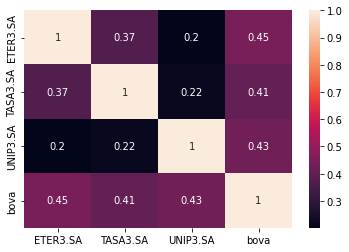

In [36]:
#Creates a correlation matrix
# The less correlated the stocks are the better the diversification is
figura5 = sns.heatmap(carteira_bova.corr(), annot = True)


In [37]:
#Result
print(ac_carteira)
ef.portfolio_performance(verbose=True)

{'ETER3.SA': 0.04703, 'TASA3.SA': 0.35069, 'UNIP3.SA': 0.60228}
Expected annual return: 52.6%
Annual volatility: 36.1%
Sharpe Ratio: 1.40


(0.5255768894973347, 0.3614007694000919, 1.3989369484092917)